# k-Means Clustering

This notebook uses sample data to demonstrate the k-Means clustering algorithm by building the model from scratch.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# settings
seed = 1234
np.random.seed(seed)

In [3]:
# load data
data = np.load('AllSamples.npy')

In [4]:
# define functions to initialize k cluster centroids
def get_initial_centroids(data, k):
    N = data.shape[0]
    initial_indices = np.random.RandomState(seed=seed).permutation(N)[:k]
    initial_centers = data[initial_indices,:]
    
    return initial_centers

In [5]:
# get initial points for a defined k
k = 3
initial_centroids = get_initial_centroids(data, k)

In [6]:
# preview
print('K = {}'.format(k))
print('Initial Centroids:\n{}'.format(initial_centroids))

K = 3
Initial Centroids:
[[7.77126987 8.91428052]
 [2.23518365 3.77218252]
 [2.69511302 5.93967352]]


In [7]:
# create k-Means functions
class kMeans:
    def __init__(self, data, k, centroids):
        """Initializes the k-means model"""
        self.data = data           # 2D data array
        self.k = k                 # number of clusters
        self.centroids = centroids # initialized cluster centers
        self.distances = {}        # distance of each point to each cluster center
        self.clusters = {}         # lists of points for each cluster association
        self.cost = 0              # total cost (i.e. inertia) to measure 'loss'
    
    def compute_distances(self):
        """Computes the Euclidean distance between each data point and each cluster centroid"""
        self.distances = {}
        for i in range(self.k):
            centroid = self.centroids[i,:]
            self.distances[i] = [np.linalg.norm(point - centroid) for point in self.data]
    
    def assign_to_cluster(self):
        """Assigns each point to the closest centroid"""
        self.clusters = {}
        n = self.data.shape[0]
        
        for a in range(self.k):
            self.clusters[a] = []
            
        for b in range(n):
            temp = [self.distances[x][b] for x in self.distances.keys()]
            cluster_center, data_point = np.argmin(temp), self.data[b]
            self.clusters[cluster_center].append(data_point)
        
        for c in range(self.k):
            self.clusters[c] = np.array(self.clusters[c])
    
    def visualize_data(self):
        """Plots the data with its respective centroids"""
        fig, ax = plt.subplots(1, 1)
        
        for k in self.clusters.keys():
            data = self.clusters[k]
            x, y = data[:,0], data[:,1]
            
            centroid = self.centroids[k]
            xc, yc = centroid[0], centroid[1]
            
            plt.scatter(x, y)
            plt.scatter(xc, yc, c='black', s=150, marker='x', linewidth=5)
            
        plt.show()
    
    def compute_cluster_centers(self):
        """Computes new cluster centers for each group based on average distance"""
        new_centroids = []
        for k in self.clusters.keys():
            data = self.clusters[k]
            new_centroids.append(np.mean(data, axis=0))
            
        self.centroids = np.array(new_centroids)
        
    def compute_cost(self):
        """Computes the inertia (i.e. loss) for the current solution"""
        total_cost = 0
        for k in self.clusters.keys():
            centroid = self.centroids[k]
            data = self.clusters[k]
            centroid_cost = np.sum([(point - centroid)**2 for point in data])
            total_cost += centroid_cost
            
        self.cost = total_cost
        
    def run_solver(self):
        """Iterates until the solver converges and the cluster centers no longer update"""
        keep_going = True
        while keep_going:
            old_centroids = self.centroids
            self.compute_distances()
            self.assign_to_cluster()
            self.visualize_data()
            self.compute_cluster_centers()
            
            if np.array_equal(old_centroids, self.centroids):
                keep_going = False
                
                for k in range(self.k):
                    print('Cluster {} centroid: {}'.format(k+1, self.centroids[k]))
                    
                self.compute_cost()
                print('Total inertia: {}'.format(self.cost))

In [8]:
# initialize instance with k=3, data, and initialized centroids
my_kMeans = kMeans(data, k, initial_centroids)

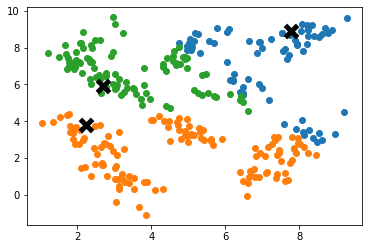

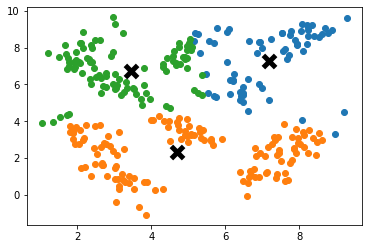

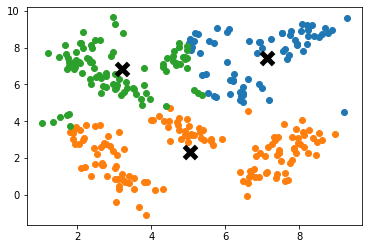

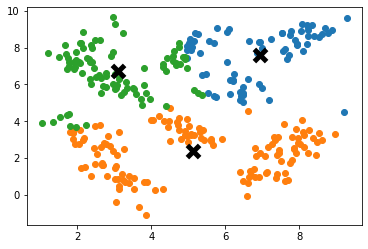

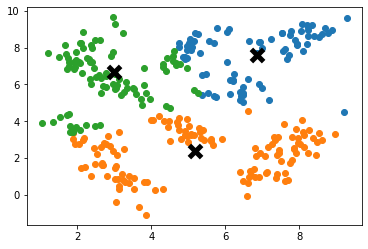

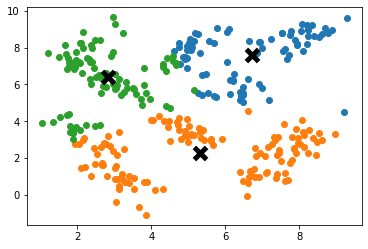

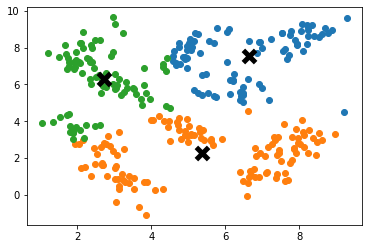

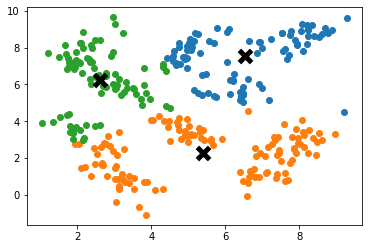

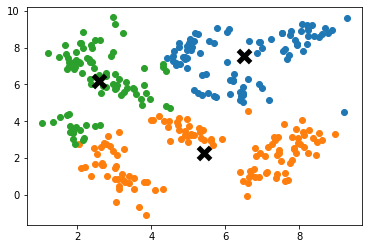

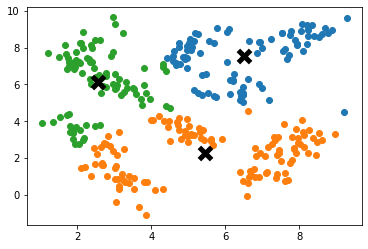

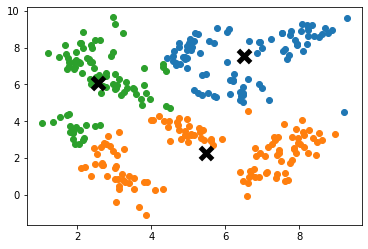

Cluster 1 centroid: [6.49724962 7.52297293]
Cluster 2 centroid: [5.47740039 2.25498103]
Cluster 3 centroid: [2.56146449 6.08861338]
Total inertia: 1293.777452391135


In [9]:
# run unsupervised learning algorithm
my_kMeans.run_solver()